In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H:%M')
df = pd.read_csv('../datatraining.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:00,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
Light = df['Light'].copy()

In [4]:
Light.head()

date
2015-02-04 17:51:00    426.0
2015-02-04 17:51:00    429.5
2015-02-04 17:53:00    426.0
2015-02-04 17:54:00    426.0
2015-02-04 17:55:00    426.0
Name: Light, dtype: float64

In [6]:
hour = [g for n, g in Light.groupby(pd.TimeGrouper('H'))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [7]:
del hour[0]

In [8]:
del hour[135]

In [9]:
for i in range (0, len(hour)):
    print(len(hour[i]))

60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59
60
61
59


In [10]:
for i in range (0, len(hour)):
    if len(hour[i])==59 :
        print(len(hour[i]))
    elif len(hour[i])==60 :
        hour[i] = hour[i][: len(hour[i]) - 1] 
        print(len(hour[i]))
    else:
        hour[i] = hour[i][: len(hour[i]) - 2]
        print(len(hour[i]))

59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


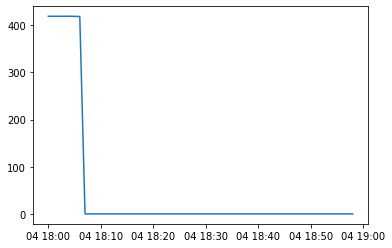

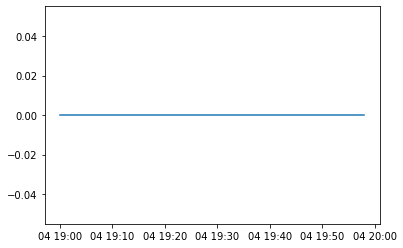

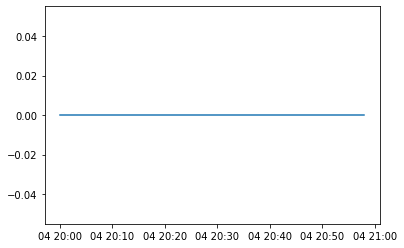

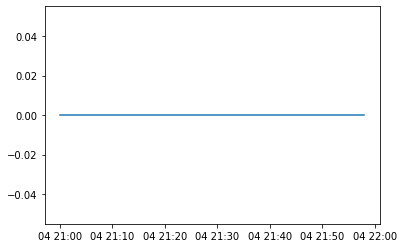

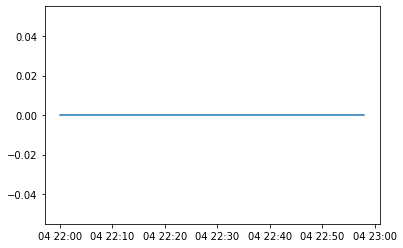

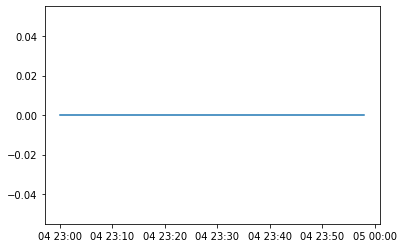

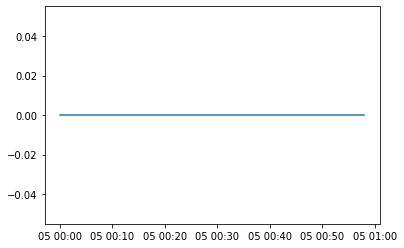

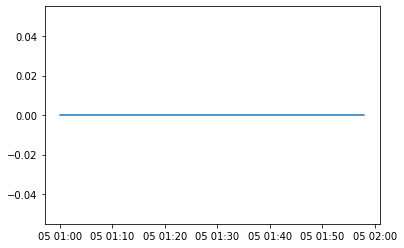

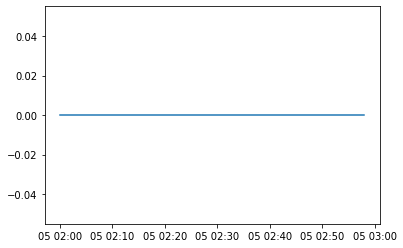

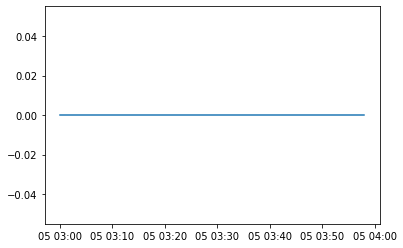

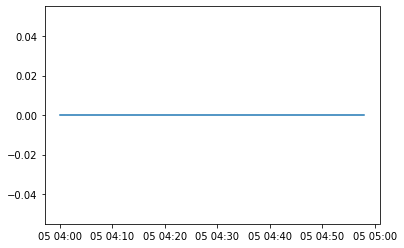

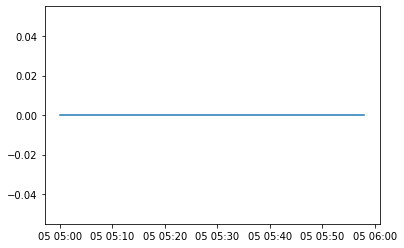

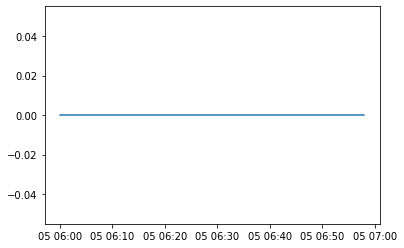

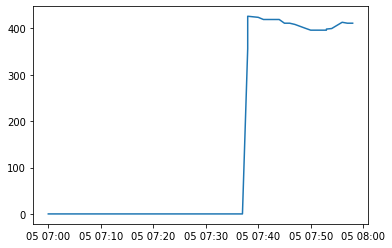

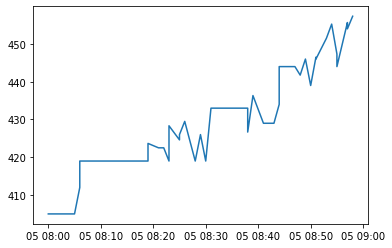

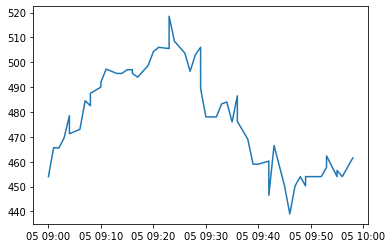

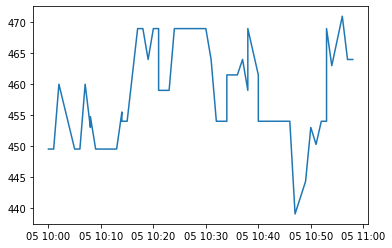

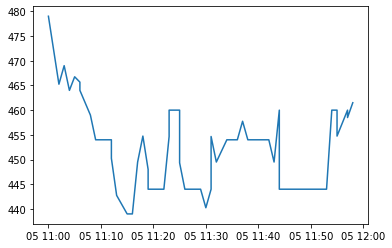

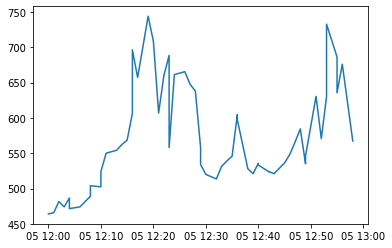

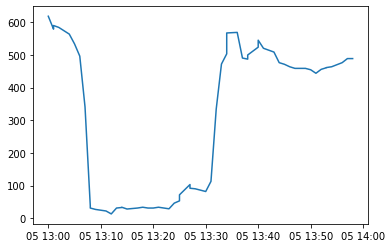

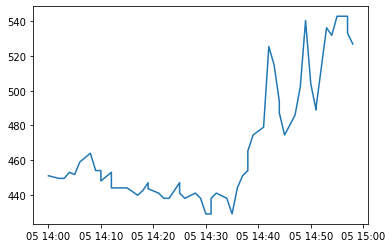

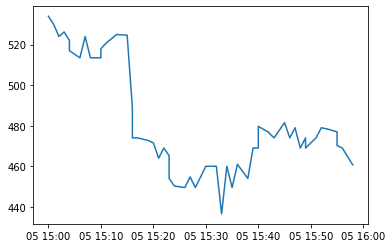

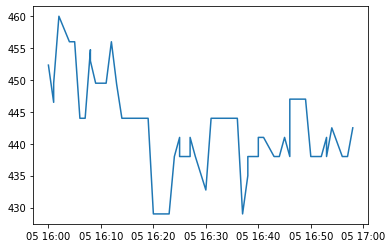

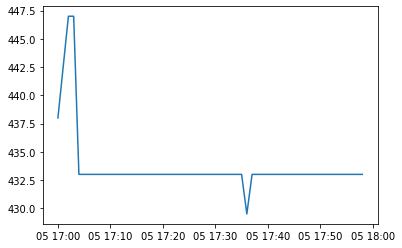

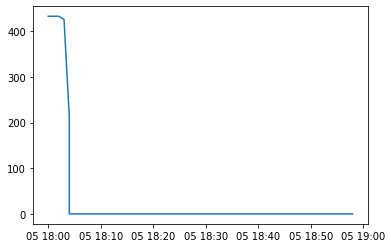

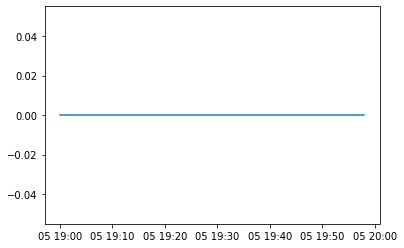

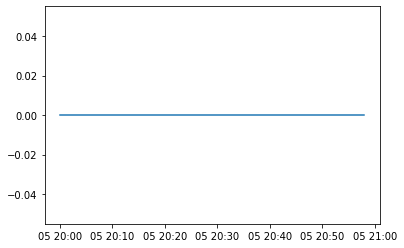

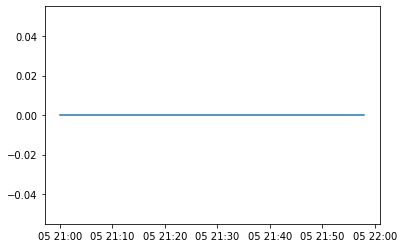

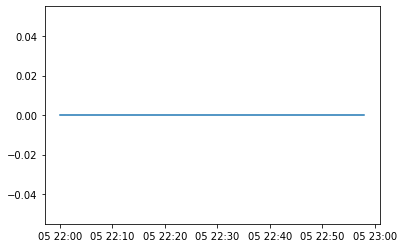

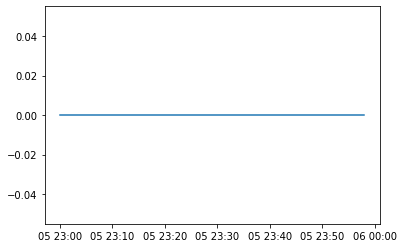

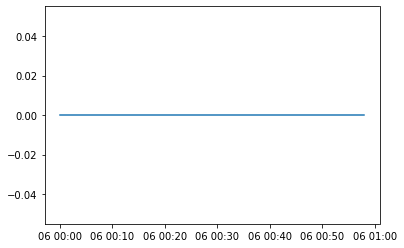

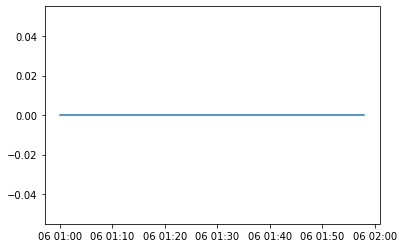

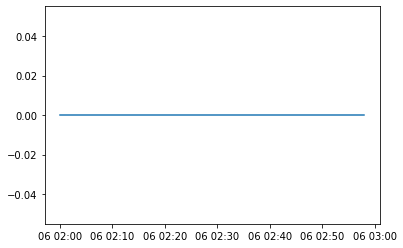

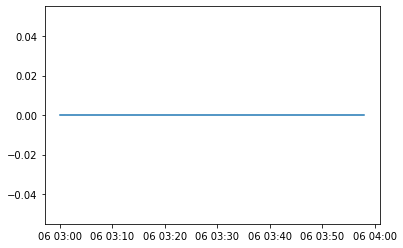

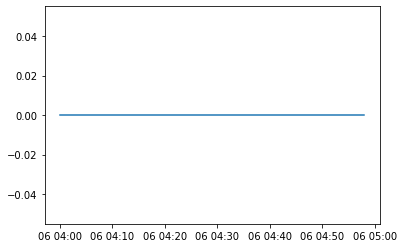

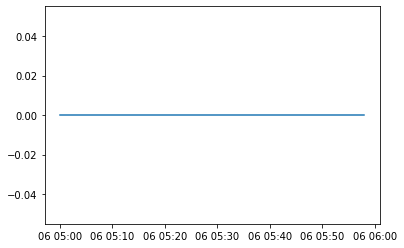

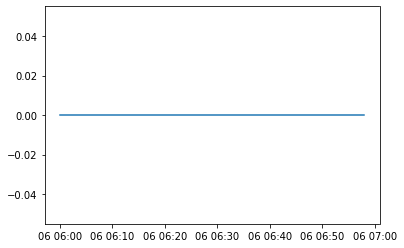

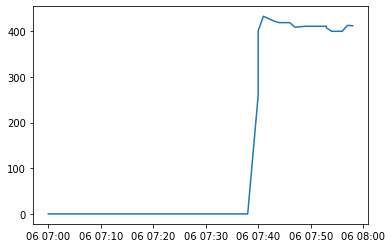

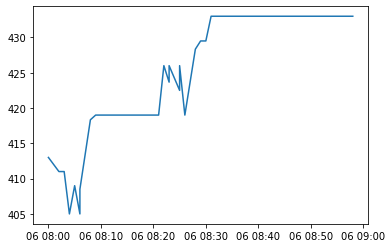

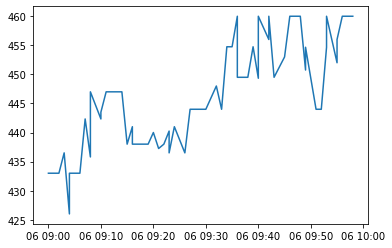

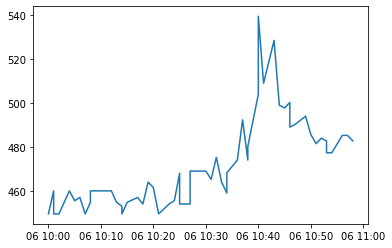

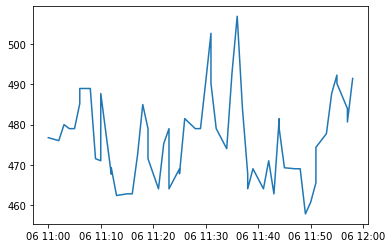

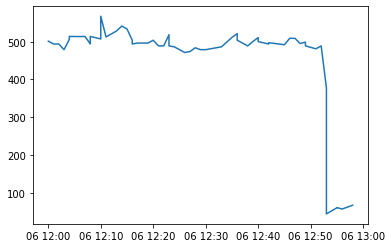

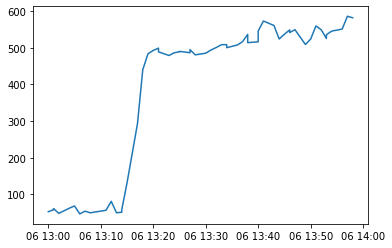

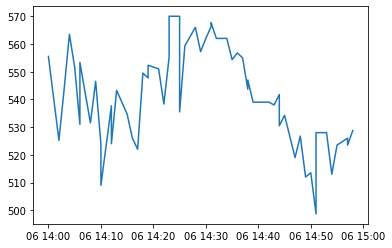

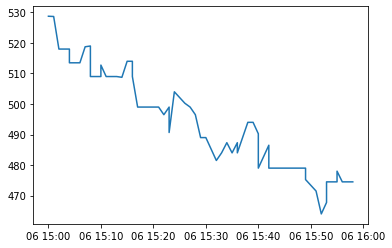

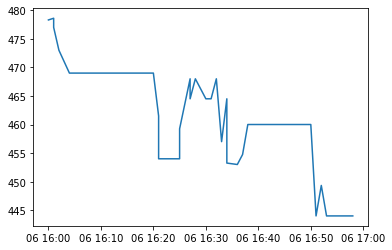

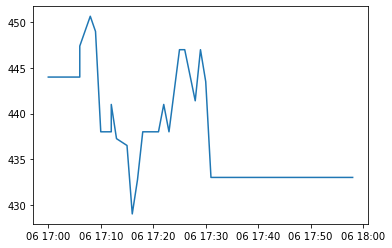

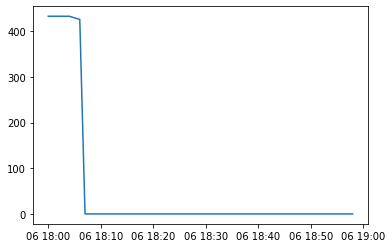

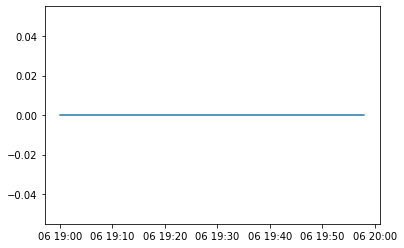

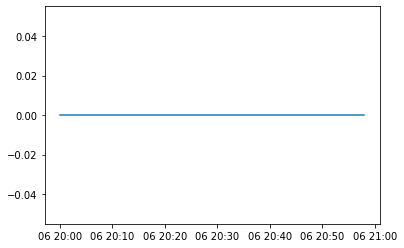

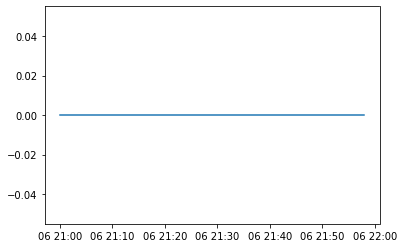

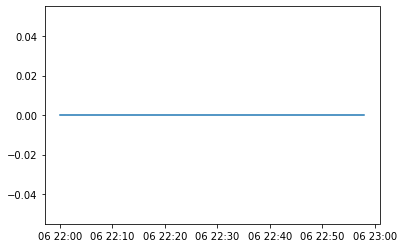

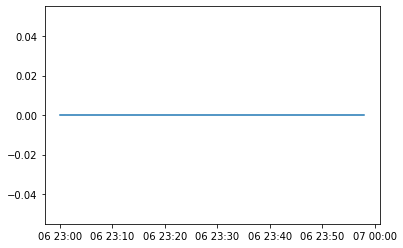

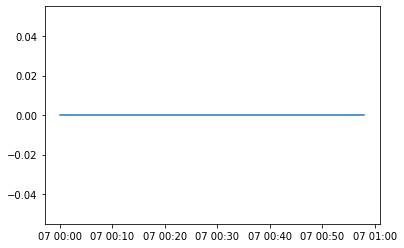

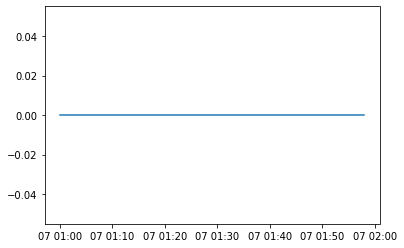

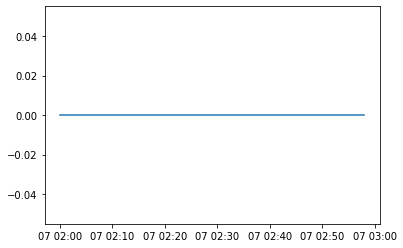

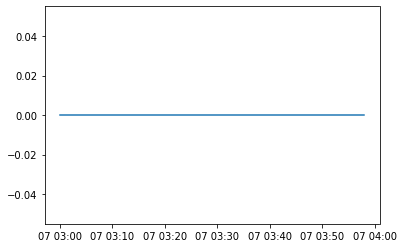

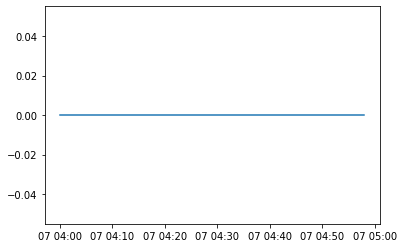

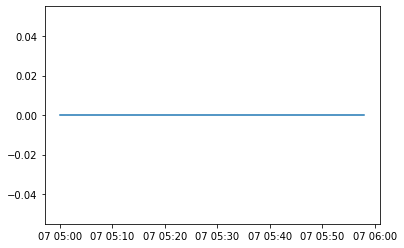

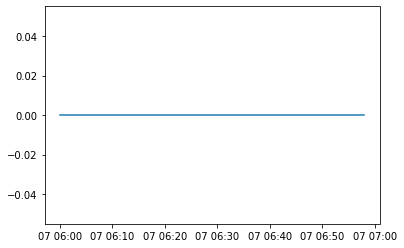

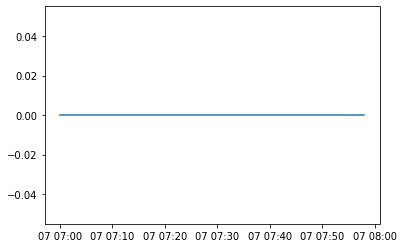

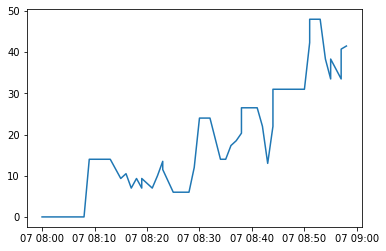

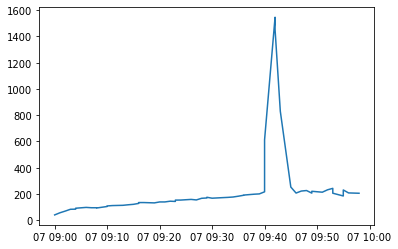

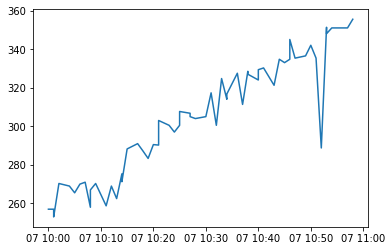

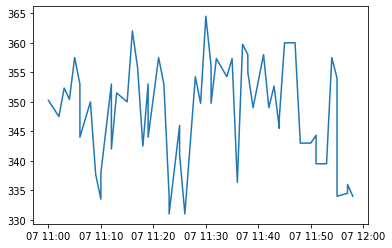

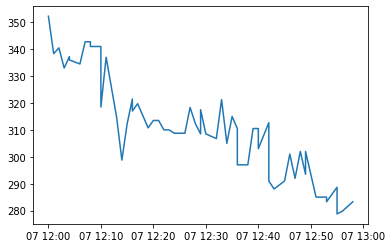

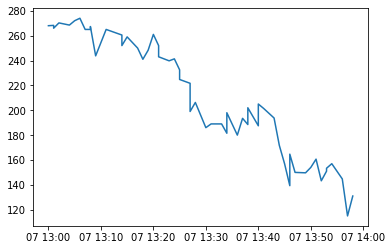

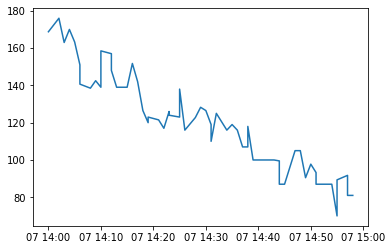

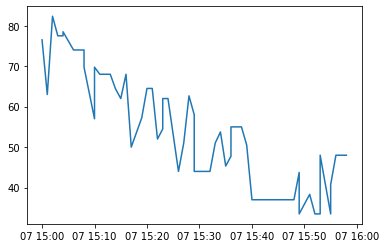

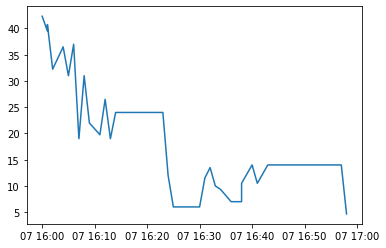

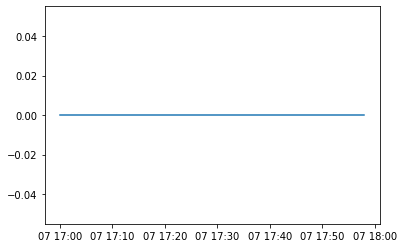

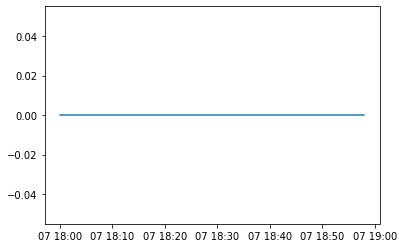

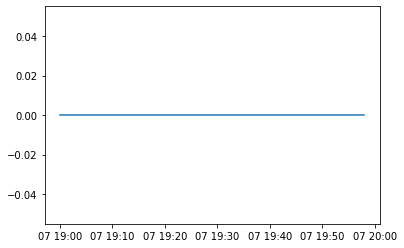

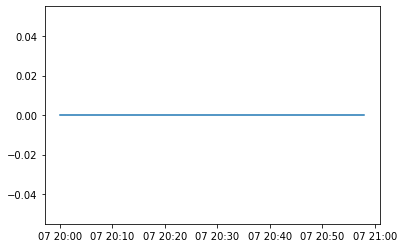

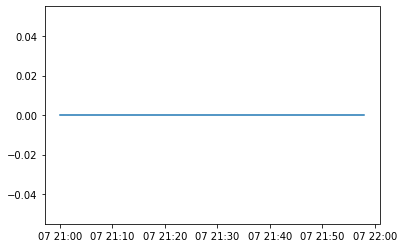

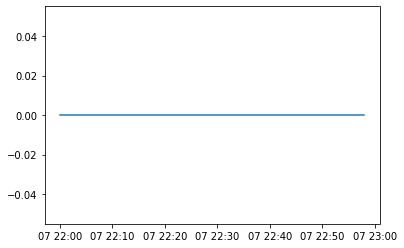

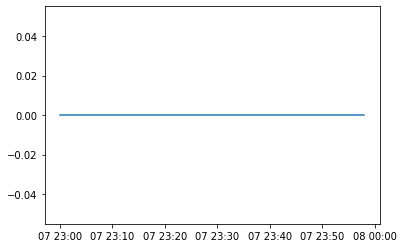

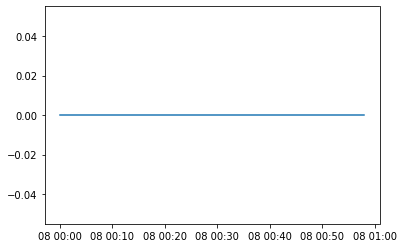

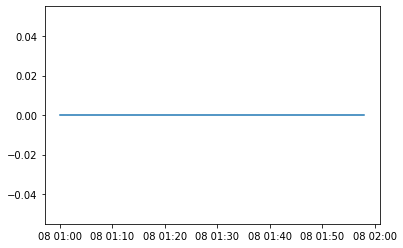

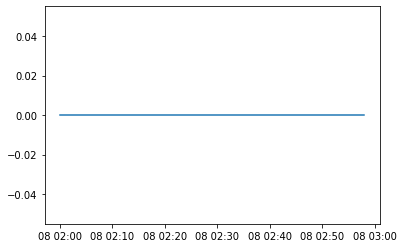

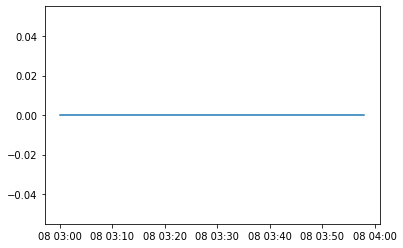

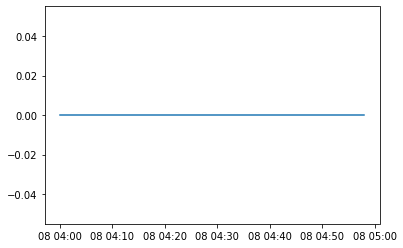

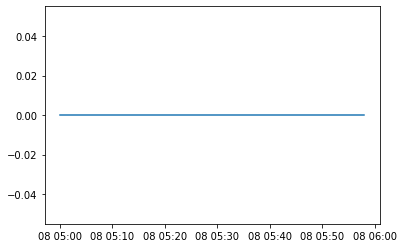

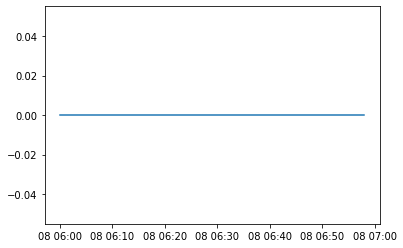

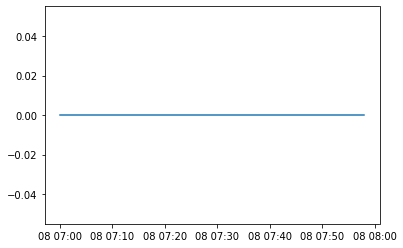

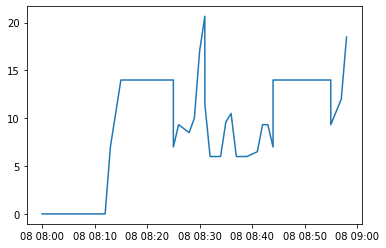

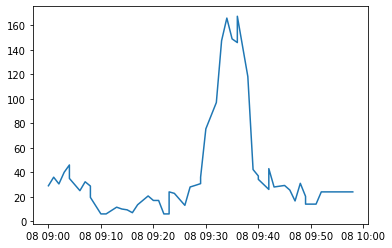

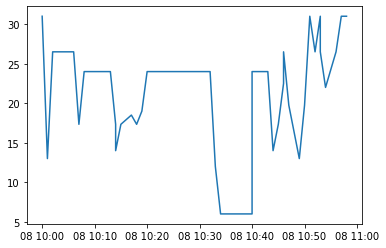

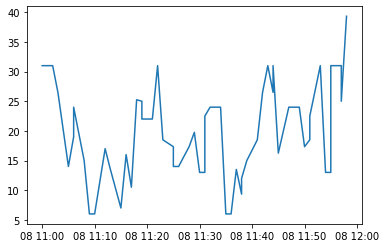

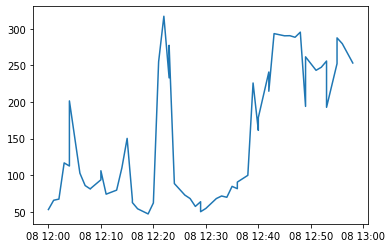

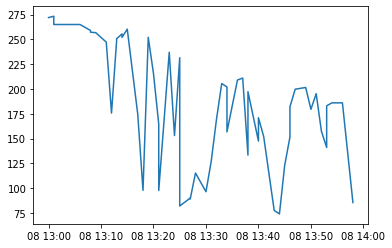

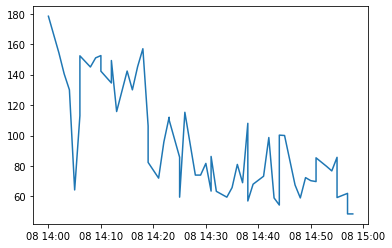

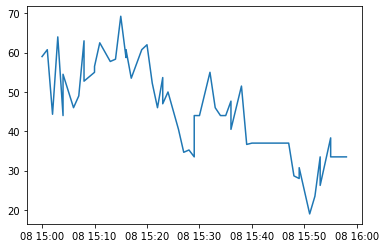

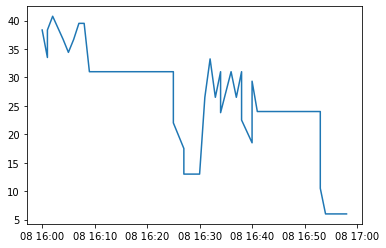

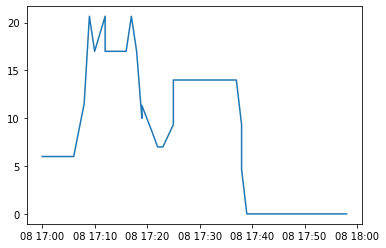

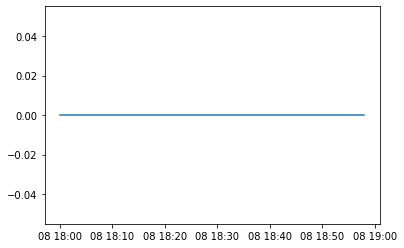

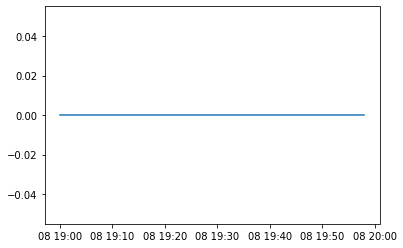

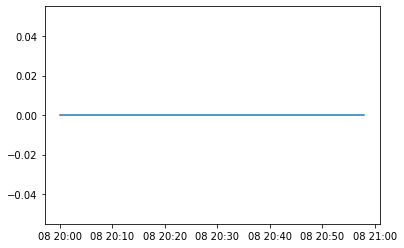

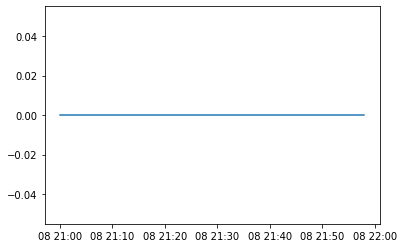

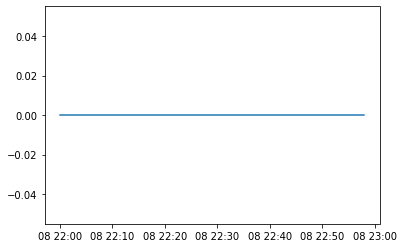

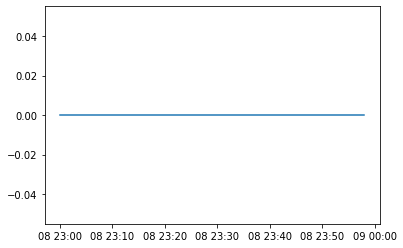

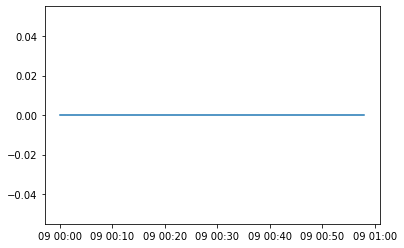

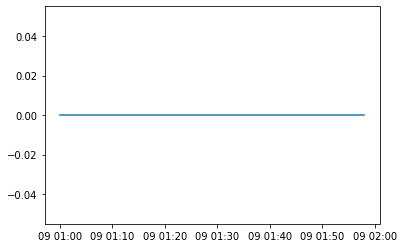

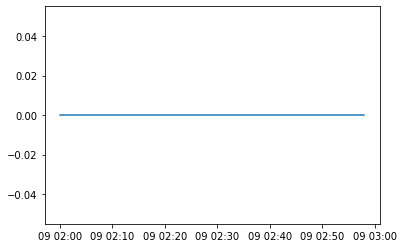

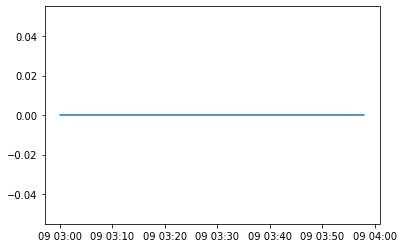

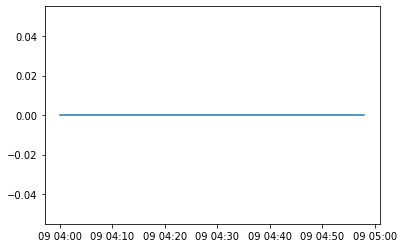

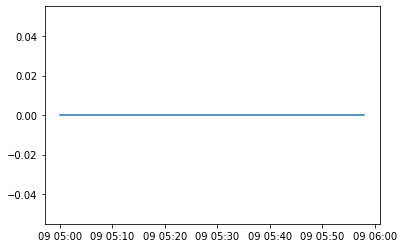

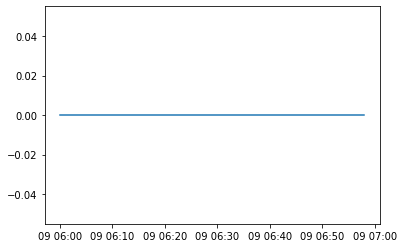

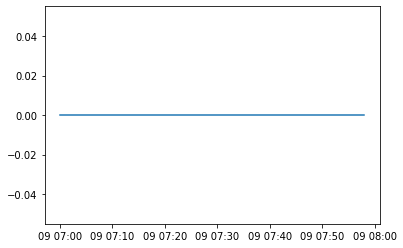

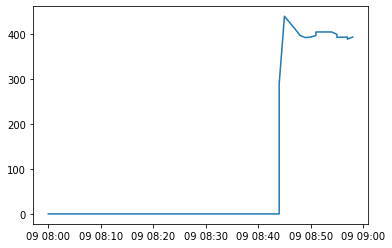

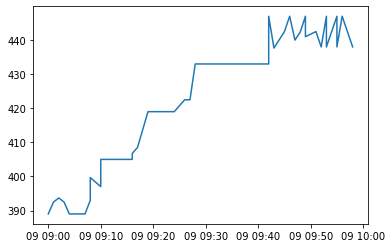

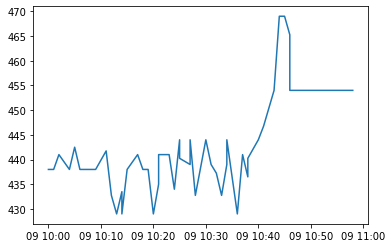

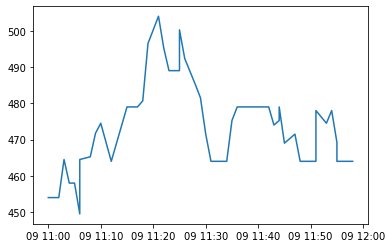

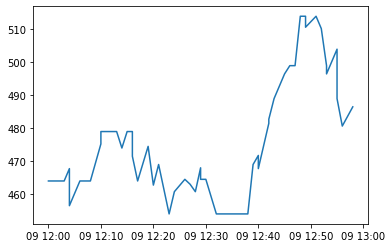

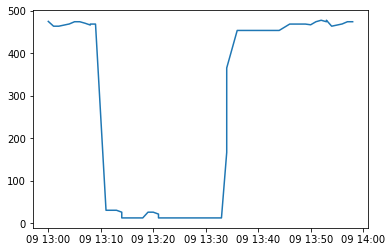

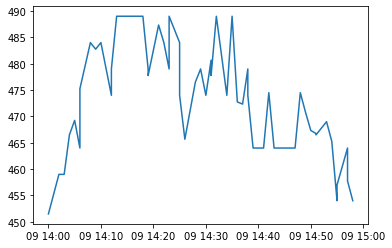

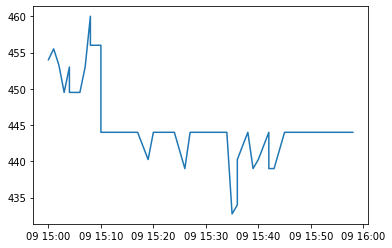

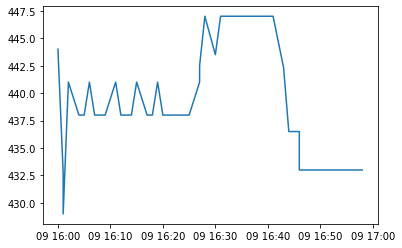

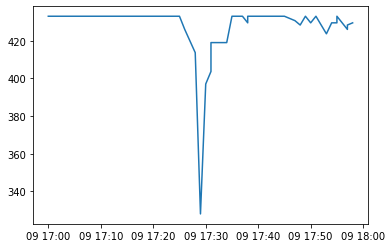

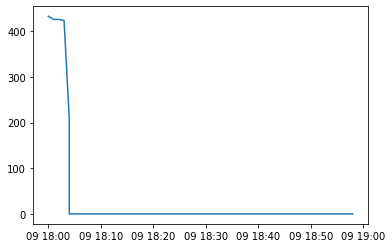

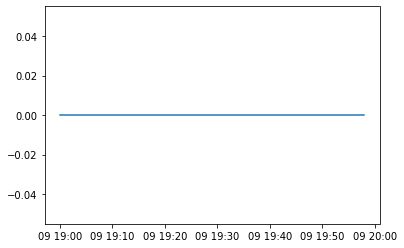

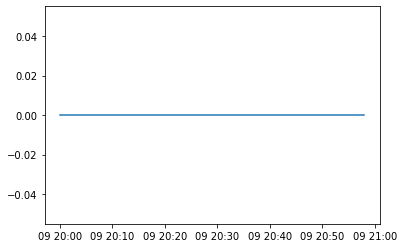

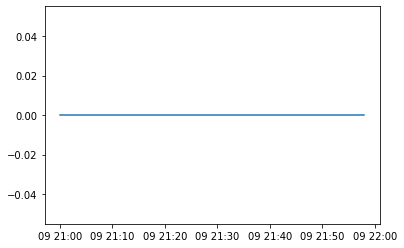

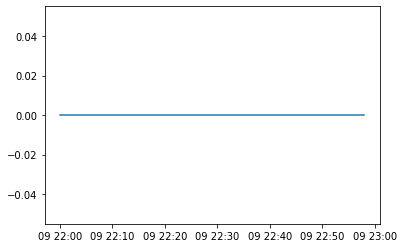

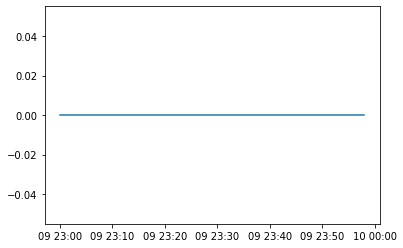

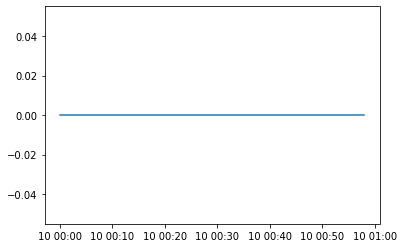

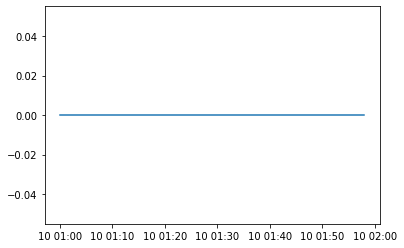

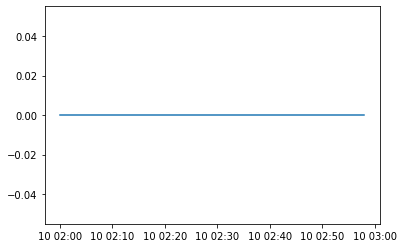

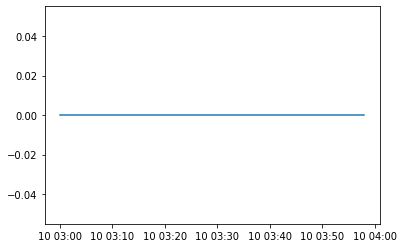

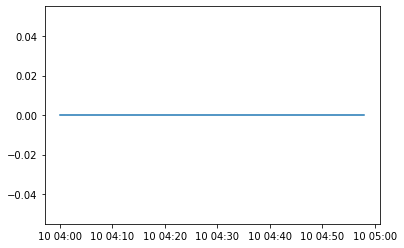

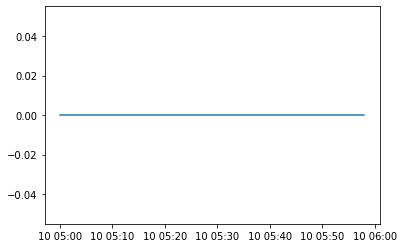

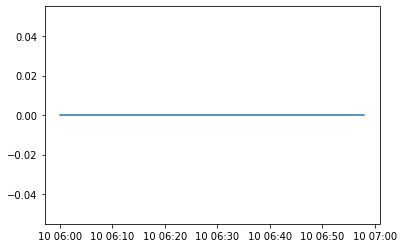

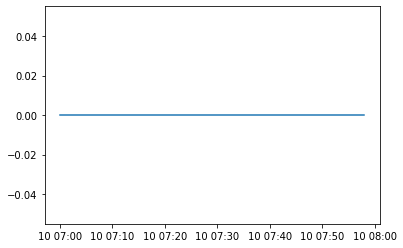

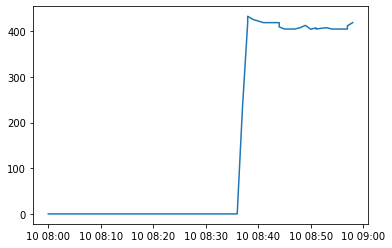

In [11]:
for i in range(0, len(hour)):
    plt.plot(hour[i])
    plt.show()

In [12]:
hour=np.asarray(hour)

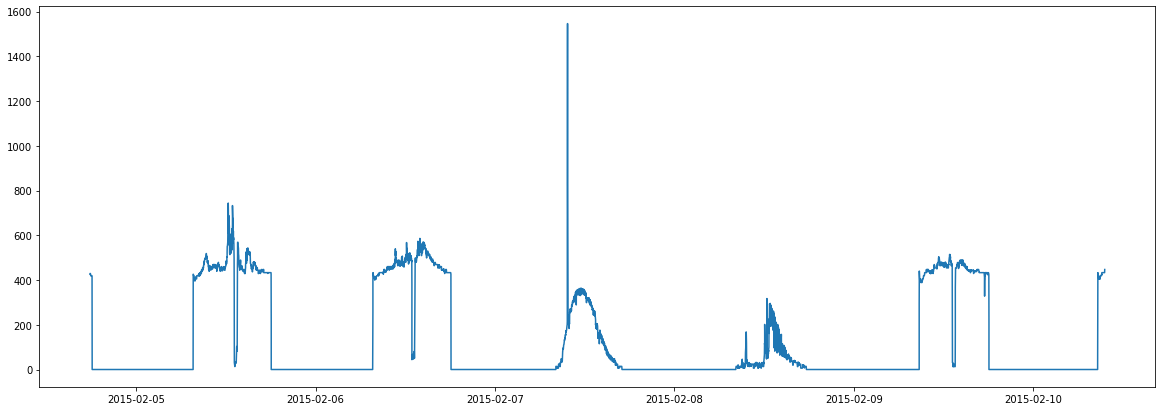

In [13]:
plt.figure(figsize=(20,7))
plt.plot(Light)
plt.show()

In [14]:
type(hour)

numpy.ndarray

In [15]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=20, random_state=0)
km.fit(hour)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=20,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=3, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

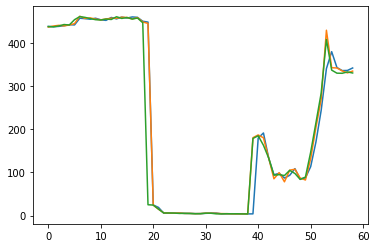

In [16]:
plt.plot(km.cluster_centers_.reshape(hour.shape[1], 3))
plt.show()

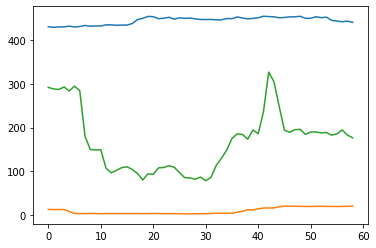

In [50]:
for i in range(3):
    plt.plot(np.mean(hour[np.where(km.labels_ == i)[0]], axis=0))
plt.show()

In [17]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2])

In [18]:
km.inertia_

212170.6516980622

In [19]:
from sklearn.cluster import KMeans

In [20]:
import numpy as np
import scipy.stats as stats

In [21]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
    }

    return features

In [22]:
features = calculate_features(hour)

In [23]:
features

{'avg': 117.86055450931158,
 'std': 193.95568760681357,
 'var': 37618.80875503185,
 'med': 0.0,
 '10p': 0.0,
 '25p': 0.0,
 '50p': 0.0,
 '75p': 224.666666666667,
 '90p': 459.0,
 'iqr': 224.666666666667,
 'cov': 0.6076674314817628,
 'skw': array([1.08254925, 1.07060875, 1.07757549, 1.07185615, 1.12358316,
        1.13819065, 1.14917318, 1.2495328 , 1.29107049, 1.29070821,
        1.29016603, 1.35413369, 1.35778014, 1.36281136, 1.35774499,
        1.35029965, 1.3476954 , 1.37840434, 1.36363862, 1.38858344,
        1.3698114 , 1.3063833 , 1.32639508, 1.33775118, 1.29747333,
        1.34023452, 1.36763974, 1.35716032, 1.36509016, 1.3295467 ,
        1.33377495, 1.31924963, 1.27438738, 1.25279293, 1.24357649,
        1.22972398, 1.20599859, 1.16508235, 1.12967612, 1.10194094,
        1.09762982, 1.07488395, 2.21474068, 2.03903358, 1.13612967,
        1.0204689 , 1.02935127, 1.02641965, 1.03194446, 1.03411025,
        1.02258231, 1.05221553, 1.05029546, 1.05126563, 1.14685757,
        1.12076

In [24]:
F = [list(calculate_features(x).values())[:-2] for x in hour]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [25]:
F

[[49.70338983050848,
  135.46861912697742,
  18351.74676817007,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  418.6,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [144.82203389830508,
  195.01820105410485,
  38032.09874237926,
  0.0,
  0.0,
  0.0,
  0.0,
  398.9166666666665,
  414.20000000000005,
  398.9166666666665],
 [428.95649717514124,
  13.560432505139763,
  183.8853297264511,
  428.333333333333,
  417

In [26]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(F)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans.inertia_

43007118.16970155

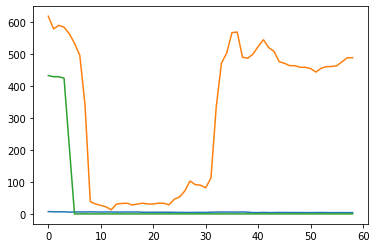

In [28]:
for i in range(3):
    plt.plot(np.mean(hour[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

In [29]:
kmeans.labels_

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 7, 7, 8, 1, 7, 7,
       7, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 7, 7, 5, 6,
       7, 7, 7, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 7,
       7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 7, 7, 7, 7, 6, 7, 7, 7, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3], dtype=int32)

In [30]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [31]:
n_paa_segments = 20
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(hour)

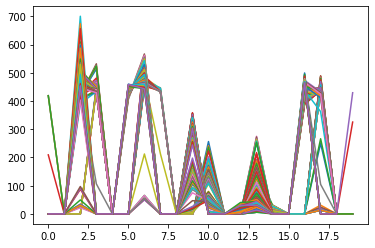

In [32]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [33]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=3, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

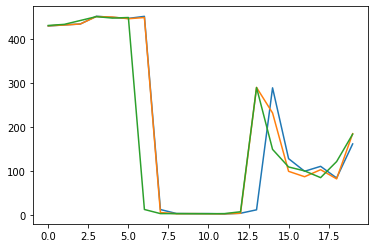

In [34]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 3))
plt.show()

In [35]:
kmeans.inertia_

43007118.16970155

In [36]:
kmeans.labels_

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 7, 7, 8, 1, 7, 7,
       7, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 7, 7, 5, 6,
       7, 7, 7, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 7,
       7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 7, 7, 7, 7, 6, 7, 7, 7, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3], dtype=int32)

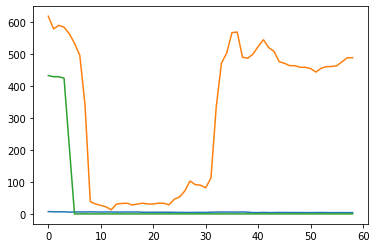

In [37]:
for i in range(3):
    plt.plot(np.mean(hour[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

In [38]:
from sklearn.metrics import pairwise_distances

In [39]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [40]:
X=hour

In [41]:
import zlib
import string

In [42]:
M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)

In [43]:
M.shape

(135, 135)

In [44]:
M

array([[0.59615385, 0.75609756, 0.75609756, ..., 0.75609756, 0.75609756,
        0.84210526],
       [0.75609756, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.86904762],
       [0.75609756, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.86904762],
       ...,
       [0.75609756, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.86904762],
       [0.75609756, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.86904762],
       [0.84210526, 0.86904762, 0.86904762, ..., 0.86904762, 0.86904762,
        0.54347826]])

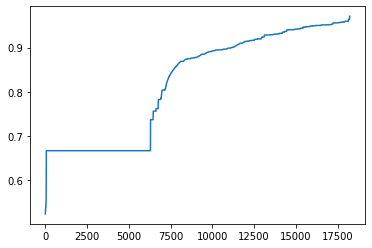

In [45]:
plt.plot(sorted(M.ravel()))
plt.show()

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan = DBSCAN(eps=0.80, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [48]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

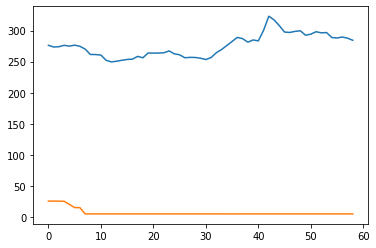

In [49]:
for i in [-1, 0]:
    plt.plot(np.mean(hour[np.where(dbscan.labels_ == i)[0]], axis=0))
plt.show()